# Scipy

Basic functions of the `scipy` library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Optimization

In [2]:
from scipy.optimize import minimize

Minimize some function.
For example:

$$ f(x) = x^2 + 10 \sin(x) $$

Minimum at x=[-1.30644012]


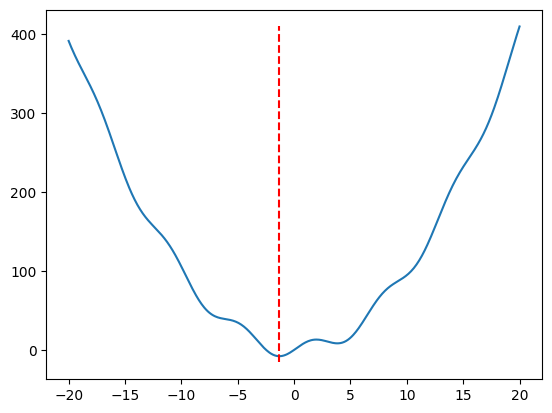

In [17]:
# Define the function to be minimized
def f(x):
	return x**2 + 10*np.sin(x)

result = minimize(f, x0=0)
print(f"Minimum at x={result.x}")

# Plot the function
x = np.linspace(-20, 20, 500)
y = f(x)

plt.plot(x, y)
plt.vlines(result.x, ymin=y.min()*2, ymax=y.max(), color='red', linestyle='dashed')
plt.show()

Minimize a function with constraints.
For example:

$$ f(x, y) = x^2 + y^2 $$

Subject to:

$$ x + y = 1 $$
$$ y \geq 0 $$
$$ x \geq 0 $$

In [19]:
f = lambda x: x[0]**2 + x[1]**2

constraints = (
	{'type': 'eq', 'fun': lambda x: x[0] + x[1] - 1},
	{'type': 'ineq', 'fun': lambda x: x[0] - x[1]},
	{'type': 'ineq', 'fun': lambda x: -x[0]},
	{'type': 'ineq', 'fun': lambda x: -x[1]}
)

result = minimize(f, x0=[0, 0], constraints=constraints)

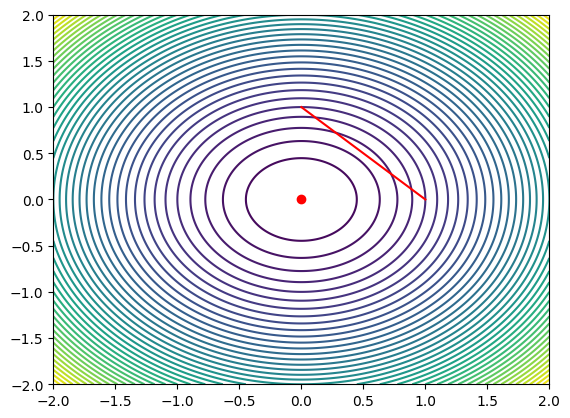

Minimum at x=[3.65726489e-16 4.06582969e-16]
Constraint 1: 3.6572648857320485e-16 + 4.065829685372077e-16 = 7.723094571104126e-16
Constraint 2: 3.6572648857320485e-16 - 4.065829685372077e-16 = -4.085647996400283e-17
Constraint 3: -3.6572648857320485e-16 >= 0


In [21]:
# Plot function, constraint and minimum
x = np.linspace(-2, 2, 500)
y = np.linspace(-2, 2, 500)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

plt.contour(X, Y, Z, 50)
plt.plot([0, 1], [1, 0], color='red')
plt.scatter(result.x[0], result.x[1], color='red')
plt.show()
